<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Import Folder

In [57]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

In [58]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

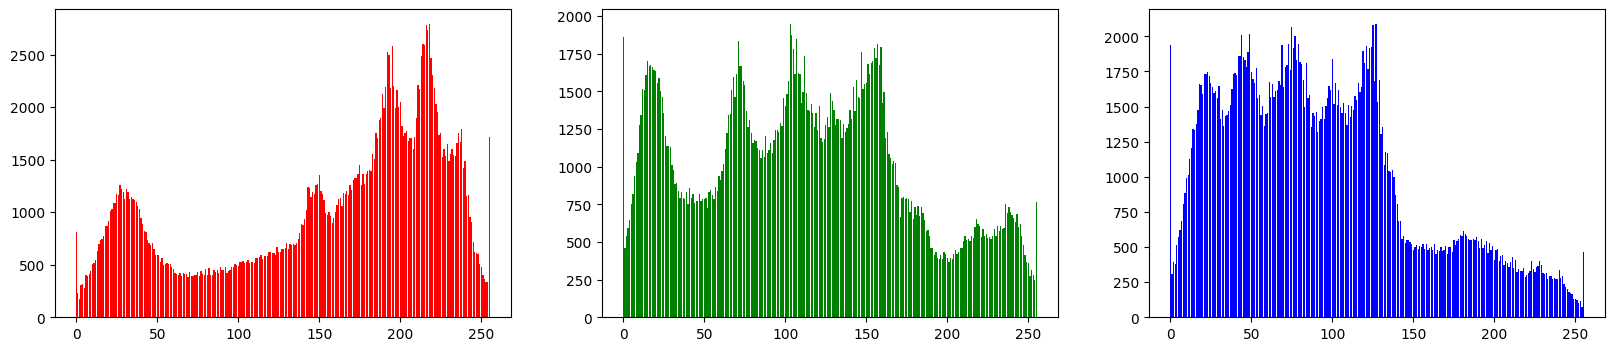

In [59]:
# Input Image
img = io.imread('/content/drive/MyDrive/images/lena.jpg')

# Hitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

# Inisialisasi array histogram
ht_r, ht_g, ht_b = [np.zeros(256, dtype=int) for _ in range(3)]

# Iterasi setiap pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    # Dapatkan nilai RGB
    r = img[y, x, 0] # Red channel
    g = img[y, x, 1] # Green channel
    b = img[y, x, 2] # Blue channel

    ht_r[r] += 1
    ht_g[g] += 1
    ht_b[b] += 1

# Tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), ht_r, color='r')

plt.subplot(132)
plt.bar(range(256), ht_g, color='g')

plt.subplot(133)
plt.bar(range(256), ht_b, color='b')

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?\
Jawab :\
Ya, Sama

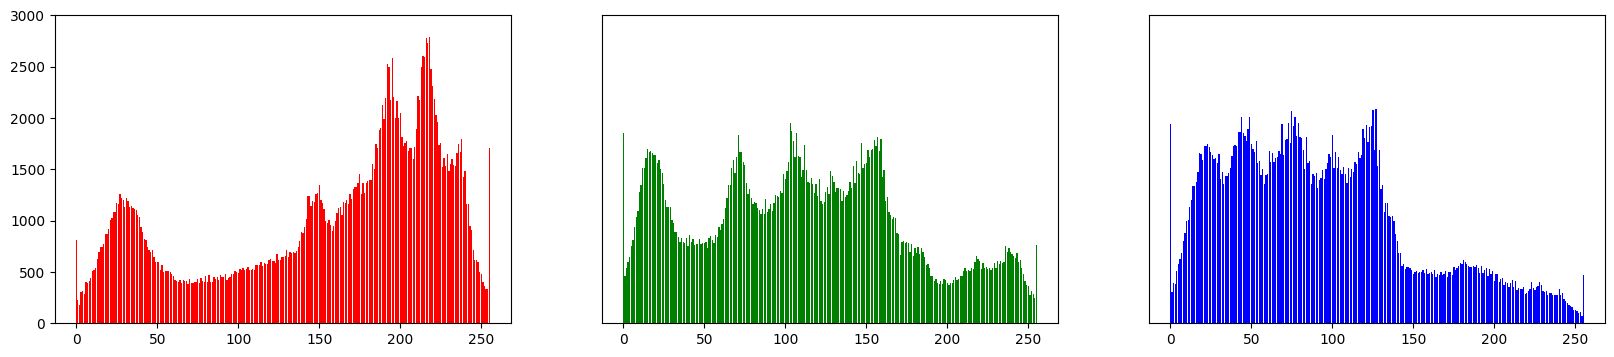

In [60]:
# Membuat histogram dengan numpy
ht_r, ht_g, ht_b = [np.histogram(img[:,:,i], 256, [0, 256])[0] for i in range(3)]

# Tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), ht_r, color='r')
plt.ylim(0, 3000)

plt.subplot(132)
plt.bar(range(256), ht_g, color='g')
plt.ylim(0, 3000)
plt.yticks([])

plt.subplot(133)
plt.bar(range(256), ht_b, color='b')
plt.ylim(0, 3000)
plt.yticks([])

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [61]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
  ht = np.zeros(256)
  for i in range(image_channel.shape[0]):
    for j in range(image_channel.shape[1]):
        ht[image_channel[i, j]] += 1
  return ht

# Fungsi untuk menghitung cumulative distribution function
def compute_cdf(ht):
  cdf = np.cumsum(ht)
  cdf_normalized = cdf / cdf[-1]
  return cdf_normalized

# Fungsi untuk melakukan histogram equalization pada setiap channel
def histogram_equalization(image_channel):
  ht = compute_histogram(image_channel)
  cdf = compute_cdf(ht)
  cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

  equalized_channel = np.zeros_like(image_channel)
  for i in range(image_channel.shape[0]):
    for j in range(image_channel.shape[1]):
        equalized_channel[i, j] = cdf_normalized[image_channel[i, j]]

  return equalized_channel

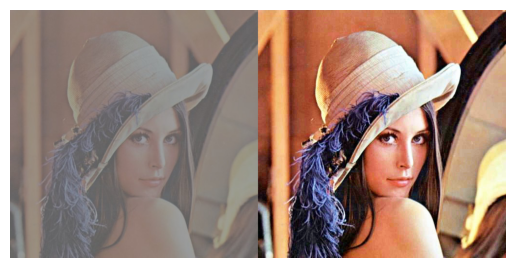

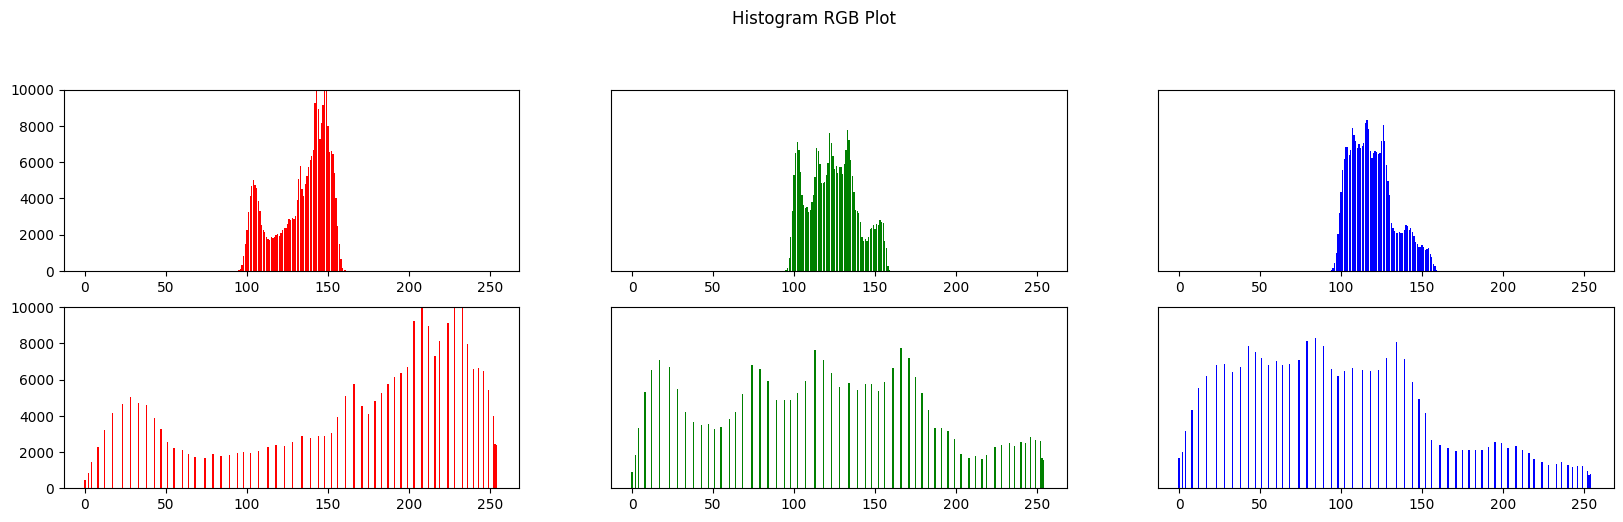

In [62]:
lena_lc = io.imread('/content/drive/MyDrive/images/lena_lc.jpg')

lena_lc_ht = compute_histogram(lena_lc)

equalized_img = histogram_equalization(lena_lc)

final_frame = cv.hconcat([lena_lc, equalized_img])

plt.imshow(final_frame)
plt.axis('off')
plt.show()
print()

# Menampilkan Histogram

R = lena_lc[:,:,0]
G = lena_lc[:,:,1]
B = lena_lc[:,:,2]

ht_r = compute_histogram(R)
ht_g = compute_histogram(G)
ht_b = compute_histogram(B)

channels = [ht_r, ht_g, ht_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))
plt.suptitle("Histogram RGB Plot")

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel,color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(equalized_img[:,:,i]),color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

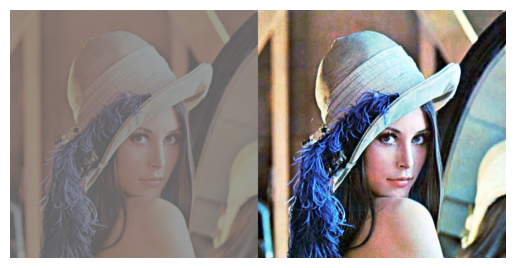

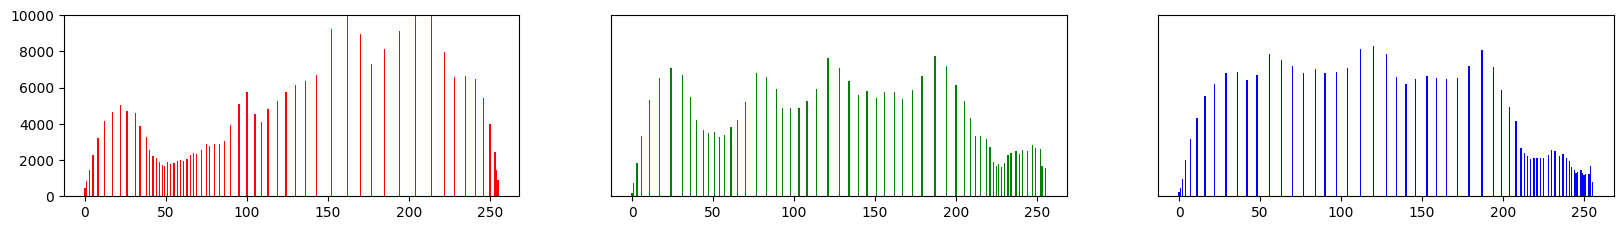

In [63]:
lena_lc = io.imread('/content/drive/MyDrive/images/lena_lc.jpg')

R = lena_lc[:,:,0]
G = lena_lc[:,:,1]
B = lena_lc[:,:,2]

ht_r = cv.equalizeHist(R)
ht_g = cv.equalizeHist(G)
ht_b = cv.equalizeHist(B)

merge = cv.merge([ht_r, ht_g, ht_b])

final_frame = cv.hconcat([lena_lc, merge])

plt.imshow(final_frame)
plt.axis('off')
plt.show()
print()

channels = [ht_r, ht_g, ht_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

for i, channel in enumerate(channels):
  plt.subplot(3, 3, i+1)
  plt.bar(range(256), compute_histogram(channel), color=colors[i])
  plt.ylim([0, 10000])

  if i != 0:
    plt.yticks([])

plt.show()

Hasilnya berbeda terjadi saat menggunakan fungsi OpenCV karena ```cv2.equalizeHist()``` hanya dapat bekerja pada satu channel (grayscale). Oleh karena itu, tiap channel RGB harus dipisahkan dan diproses secara terpisah, yang dapat menyebabkan distorsi warna karena tidak ada sinkronasi antar channel. Pendekatan yang lebih baik adalah dengan menggunakan model warna YUV atau HSV, dan menerapkan histogram equalization hanya pada komponen kecerahannya.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

In [64]:
# Mencari 8 warna terdekat, hitam, hijau, kuning, biru, cyan, magenta, putih dan merah
def find_nearest_color(color):
    # Definisikan warna-warna yang ingin dicari
    colors = {
        'black': np.array([0, 0, 0]),
        'green': np.array([0, 255, 0]),
        'yellow': np.array([255, 255, 0]),
        'blue': np.array([0, 0, 255]),
        'cyan': np.array([0, 255, 255]),
        'magenta': np.array([255, 0, 255]),
        'white': np.array([255, 255, 255]),
        'red': np.array([255, 0, 0])
    }

  # Cari warna terdekat
    nearest_color = min(colors.values(), key=lambda c: np.linalg.norm(color - c))
    return nearest_color

def mapping_color(image):
  height, width, _ = image.shape

  # Proses pemetaan warna
  img_mapped = np.zeros_like(image)

  for y in range(height):
    for x in range(width):
      color = image[y, x]
      nearest_color = find_nearest_color(color)

      img_mapped[y, x] = nearest_color

  return img_mapped

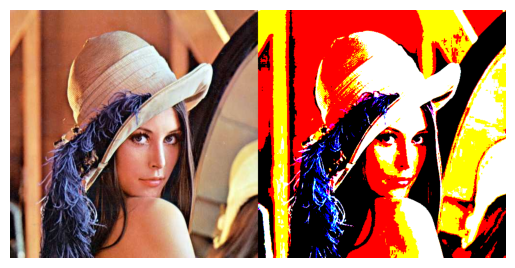

In [65]:
lena = io.imread('/content/drive/MyDrive/images/lena.jpg')

img_mapped = mapping_color(lena)

final_frame = cv.hconcat([lena, img_mapped])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

In [77]:
def threshold(value):
    """Terapkan threshold ke nilai piksel antara 0 dan 255."""
    return np.clip(value, 0, 255, out=value)

def floyd_steinberg_dithering(image):
    """Terapkan Floyd-Steinberg Dithering pada gambar RGB."""
    height, width, _ = image.shape

    # Salin gambar asli
    img_dithered = image.copy().astype(np.float32)

    # Koefisien Floyd-Steinberg untuk menyebarkan error ke tetangga
    coefficients = [
        (0, 1, 7/16),
        (1, -1, 3/16),
        (1, 0, 5/16),
        (1, 1, 1/16)
    ]

    for y in range(height - 1):
        for x in range(1, width - 1):
            # Simpan nilai piksel lama dan hitung nilai piksel baru
            pixel_old = img_dithered[y, x].copy()
            pixel_new = np.round(pixel_old / 255.0) * 255
            img_dithered[y, x] = pixel_new

            # Hitung error antara piksel lama dan baru
            error = pixel_old - pixel_new

            # Sebarkan error ke piksel tetangga
            for dy, dx, coef in coefficients:
                nx, ny = x + dx, y + dy
                if 0 <= nx < width and 0 <= ny < height:
                    img_dithered[ny, nx] += error * coef
                    img_dithered[ny, nx] = threshold(img_dithered[ny, nx])

    return img_dithered.astype(np.uint8)

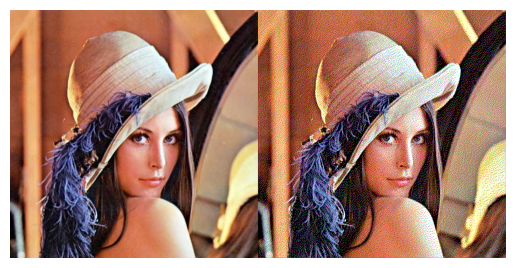

In [67]:
lena = io.imread('/content/drive/MyDrive/images/lena.jpg')

img_dithered = floyd_steinberg_dithering(lena)

final_frame = cv.hconcat([lena, img_dithered])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

In [76]:
# Grayscale dengan luminance
def grayscale_luminance(image):
    gray_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            gray_image[y, x] = np.dot(image[y, x, :], [0.299, 0.587, 0.114])

    return gray_image.astype(np.uint8)

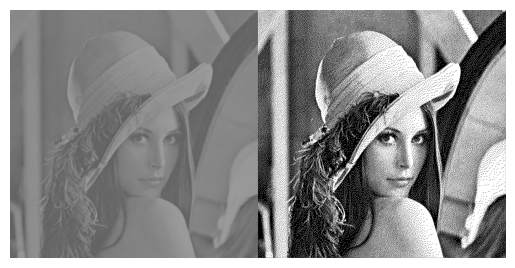

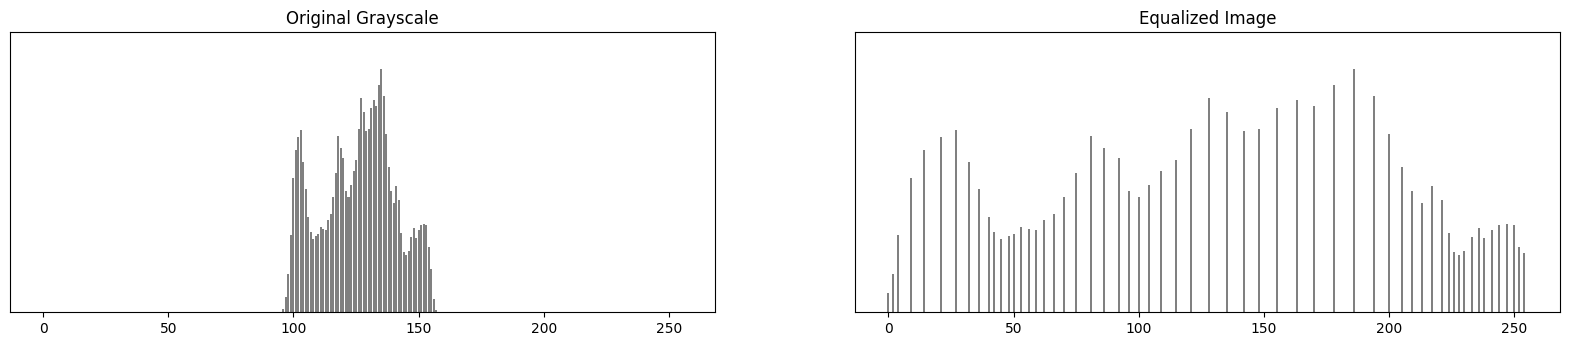

In [85]:
lena_lc = io.imread('/content/drive/MyDrive/images/lena_lc.jpg')
# Ubah ke grayscale
gray_image = grayscale_luminance(lena_lc.copy())

# Terapkan histogram equalization
equalized_img = histogram_equalization(gray_image)

# Terapkan dithering Floyd-Steinberg
img_dithered = floyd_steinberg_dithering(equalized_img)

# Gabungkan gambar asli, hasil histogram equalization, dan hasil dithering
final_frame = cv.hconcat([gray_image, img_dithered])

plt.imshow(final_frame, cmap='gray')
plt.axis('off')
plt.show()
print()

# Menampilkan Histogram Grayscale plot
plt.figure(figsize=(20, 8))

# Daftar gambar untuk histogram plot
images = [gray_image, equalized_img]
titles = ['Original Grayscale', 'Equalized Image']

# Loop untuk setiap gambar dan tampilkan histogramnya
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(256), compute_histogram(image), color='gray')
    plt.title(title)
    plt.ylim([0, 10000])
    plt.yticks([])

plt.show()